In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
df = pd.read_csv('/content/minimum_temperature.csv', parse_dates=['Date'], index_col='Date')

# Preprocessing: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Temp'].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [5]:
sequence_length = 5
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
# Do not flatten if you want to use LSTM after Conv1D
# model.add(Flatten())  # This line should be removed if you're going to use LSTM after this
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Now you should be able to fit your model without the error
model.fit(X_train, y_train, epochs=100, verbose=2)

predicted = model.predict(X_test)

Epoch 1/100
92/92 - 2s - loss: 0.0351 - 2s/epoch - 22ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0125 - 263ms/epoch - 3ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0122 - 276ms/epoch - 3ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0118 - 277ms/epoch - 3ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0113 - 263ms/epoch - 3ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0110 - 270ms/epoch - 3ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0106 - 288ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0107 - 257ms/epoch - 3ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0104 - 297ms/epoch - 3ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0103 - 451ms/epoch - 5ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0104 - 431ms/epoch - 5ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0103 - 448ms/epoch - 5ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0103 - 449ms/epoch - 5ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0101 - 438ms/epoch - 5ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0100 - 464ms/epoch - 5ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0101 - 449ms/epoc

Mean Squared Error: 5.259531802599365
Mean Absolute Error: 1.7993195753529239
Root Mean Squared Error: 2.293366914080554
Mean Absolute Percentage Error: 21.242726567120236
R-squared: 0.6879213147563011


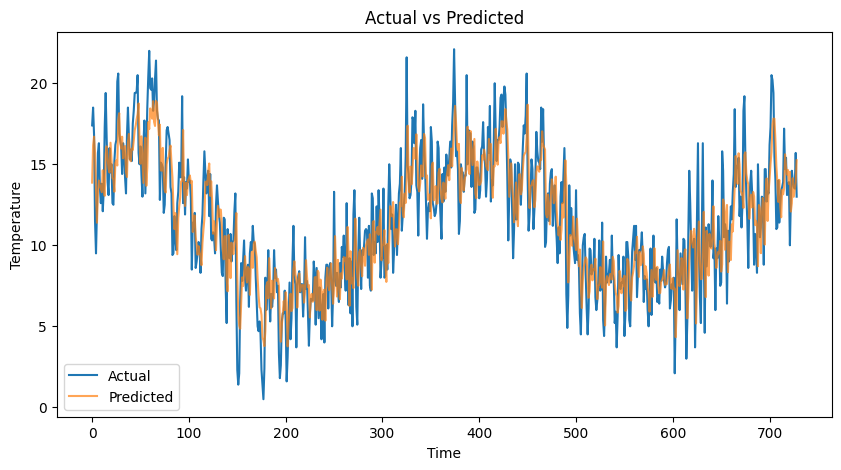

In [6]:
predicted_inverse = scaler.inverse_transform(predicted)
y_test_inverse = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inverse, predicted_inverse)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inverse, predicted_inverse)
print('Mean Absolute Error:', mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_inverse - predicted_inverse) / y_test_inverse)) * 100
print('Mean Absolute Percentage Error:', mape)

# Calculate R-squared
r2 = r2_score(y_test_inverse, predicted_inverse)
print('R-squared:', r2)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, label='Actual')
plt.plot(predicted_inverse, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('actual_vs_predicted.png')
plt.show()